In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = 'medical_examination.csv'
df = pd.read_csv(data,na_values=['','?','-'],index_col=[0])
df.head(2)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
importid,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
df.index.name = None

In [6]:
df['overweight'] = df['weight'] / ((df['height']/100)**2)
df['si_overweight'] = 0
df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,si_overweight
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,0
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,0
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,0


In [7]:
df.loc[df['overweight']>25,'si_overweight'] = 1
df.loc[df['overweight']<=25,'si_overweight'] = 0
df = df.drop(['overweight'],axis=1)

In [8]:
df= df.rename(columns={'si_overweight':'overweight'}) 

In [9]:
#Cambiar el valor de una columna especifica segun una condicion

df.loc[df['cholesterol'] == 1,'cholesterol'] = 0
df.loc[df['cholesterol']>1,'cholesterol'] = 1
df.loc[df['gluc']== 1,'gluc'] = 0
df.loc[df['gluc'] > 1,'gluc'] = 1
df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [10]:
# Generar un catplot con junto con la funcion melt()
df_drop = df.drop(['age','sex','height','weight','ap_hi','ap_lo','overweight'],axis=1)
df_melt = df_drop.melt(id_vars='cardio',var_name='variable',value_name='total')
df_melt


,cardio,variable,total
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
349995,0,active,1
349996,1,active,1
349997,1,active,0
349998,1,active,0


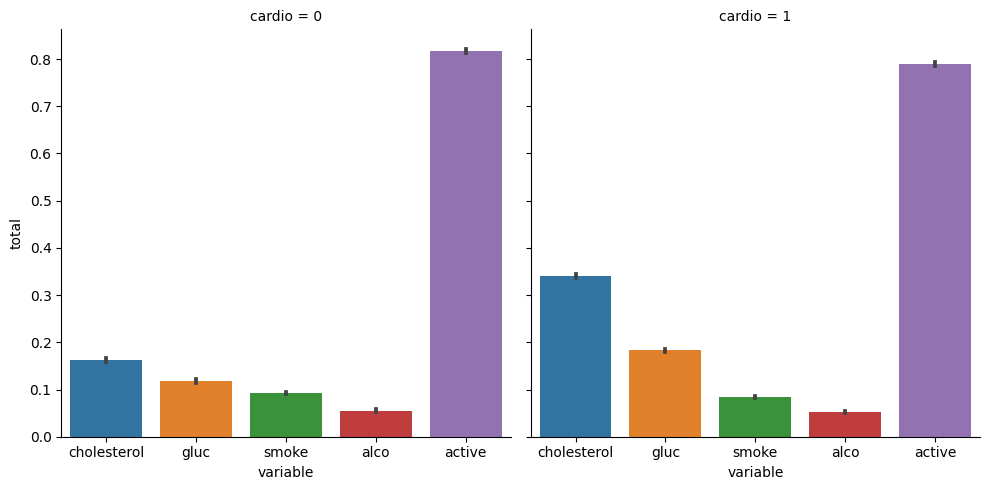

In [11]:
sns.catplot(data=df_melt,x='variable',y='total',col='cardio',kind='bar')


In [12]:
# Filtrar datos considerados errones

df = df.loc[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975))]
df


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [13]:
# Crear un mapa de calor (heatmap())
help(sns.heatmap)


Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [20]:
corr = df.corr()
corr

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
age,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.089282
sex,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.055146
height,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.156139
weight,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.655764
ap_hi,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.016900
ap_lo,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.169567
cholesterol,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.126770
gluc,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.086850
smoke,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.003981
alco,-0.026956,0.169178,0.089257,0.058286,0.000607,0.031839,0.037588,0.013617,0.341434,1.000000,0.026224,-0.011528,0.024210


In [22]:
# Ocultar la parte superior del heatmap
mask = np.triu(np.ones_like(corr,dtype='bool'))

<Axes: >

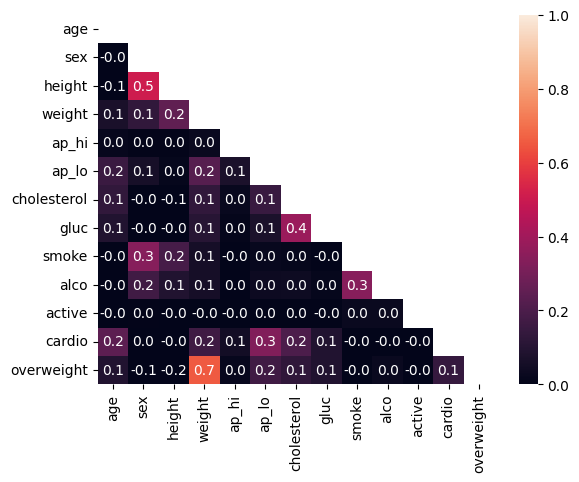

In [23]:
sns.heatmap(corr,vmax=1,vmin=0,annot=True, fmt=".1f",mask=mask)